# Assignment 3 - Linear Regression

Please add the name, first name, immatriculation number and study program below. Each member of the group has to be added:
- *Name: , First Name: , matr. number: , study program:.*
- *Name:, First Name:, matr. number:, study program:.*
- *Name:, First Name:, matr. number:, study program:.*

In this notebook, you will implement linear regression models with various feature maps on a toy dataset and on the Boston Housing dataset, which contains information about housing conditions in suburbs of Boston.

You will:
- Implement linear regression model.
- Play with different feature maps on a toy dataset.
- Be challenged to find hyperparameter and features for the boston housing dataset to reach an minimal $\operatorname{RMSE}$. *(Hint: $\operatorname{RMSE}<4.0$ is a good value)*

# Task 3 - Linear Regression with feature maps
You are given a noisy two dimensional dataset, implement different feature maps and calculate the optimal parameters using a linear regression model.

In [274]:
import numpy as np
from matplotlib import pyplot as plt
from abc import ABC, abstractmethod

$X$ refers to the input data and $y$ are the labels, note that this is a regression problem.

In [275]:
X = np.expand_dims(np.linspace(-5, 5, 64), axis=-1)
y = np.sin(X) + np.expand_dims(np.random.randn(X.shape[0]), axis=-1) * 0.5

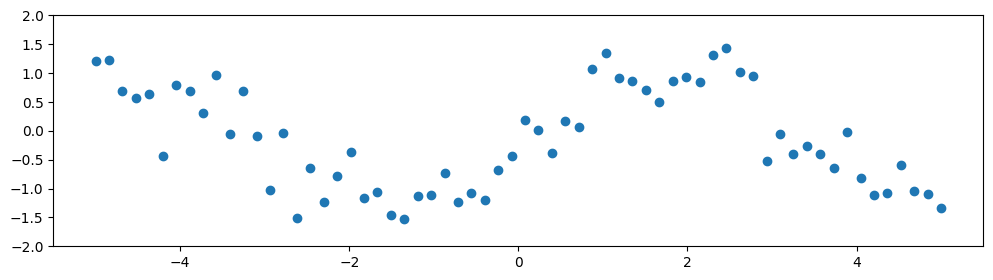

In [276]:
plt.figure(figsize=(12,3))
plt.ylim(-2, 2)
plt.scatter(X[:, 0], y);

Below you find an abstract `Base` class to implement different feature maps. A feature map $\Phi$ takes as input a data matrix $X$ and outputs the feature matrix $\Phi(X)$. This is implemented by the `__call__(self, X)` function.

In [277]:
class FeatureMap(ABC):
    
    @abstractmethod
    def __call__(self, X):
        pass

As an example see the identity features implemented as feature map, which yields a vanilla linear regression model.

In [278]:
class IdentityMap(FeatureMap):
    def __call__(self, X):
        return X

- **Task:** Implement the `fit(self, X, y)` and `predict(self, X)` function of the linear regression class below.

In [279]:
from typing import List

class LinearRegression:
    
    def __init__(self, features:List): # Your are allowed to extend the init call
        # Your solution goes here
        pass
    
    def apply_feature_maps(self, X):
        return np.concatenate(
            [f(X) for f in self.features], axis=-1
        )
    
    def fit(self, X, y):
        # Your solution goes here
        raise NotImplementedError()
       
    def predict(self, X):
        # Your solution goes here
        raise NotImplementedError()

- **Task:** Test the identity feature on the given dataset. Visualize your results using the `plot_predictor()` function. The `plot_phi()` function can be used to visualize the feature function.

In [280]:
def plot_predictor(reg, x_min=-5, x_max=5, N = 1024, train_data = None):
    xx = np.linspace(x_min, x_max, N)
    plt.figure(figsize=(12,3))
    plt.ylim(-2, 2)
    if train_data is not None:
        plt.scatter(train_data[0][:, 0], train_data[1], label="training data")
    plt.plot(xx, reg.predict(np.expand_dims(xx, axis=-1)), color='orange', label='$\hat{\mathbf{y}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    

In [281]:
def plot_phi(phi, x_min=-5, x_max=5, N = 1024):
    plt.figure(figsize=(12,3))
    xx = np.linspace(x_min, x_max, N)
    plt.plot(xx, phi(np.expand_dims(xx, axis=-1)), label=f'{phi.__class__.__name__}')
    plt.xlabel('x')
    plt.ylabel('$\Phi(x)$')
    plt.legend()

In [282]:
reg = LinearRegression(features=[IdentityMap()])
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
plot_phi(reg.features[0])


NotImplementedError: 

- **Task:** Implement polynomial features.

In [283]:
class PolynomialFeatureMap(FeatureMap):
    
    def __init__(self, degree):
        # your solution goes here
        pass
        
    def __call__(self, x):
        # your solution goes here
        raise NotImplementedError()

In [284]:
reg = LinearRegression(features=[
    PolynomialFeatureMap(0),
    PolynomialFeatureMap(1),
    PolynomialFeatureMap(2),
    PolynomialFeatureMap(3),
    PolynomialFeatureMap(4),
    PolynomialFeatureMap(5),
    PolynomialFeatureMap(6),
])
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
for phi in reg.features:
    plot_phi(phi)

NotImplementedError: 

- **Task:** Implement piecewise constant features.

In [285]:
class PiecewiseConstantFeatureMap(FeatureMap):
    
    def __init__(self, left, right):
        # your solution goes here
        pass
        
    def __call__(self, x):
        # your solution goes here
        raise NotImplementedError()

In [286]:
reg = LinearRegression(features=[
    PiecewiseConstantFeatureMap(-5, -3),
    PiecewiseConstantFeatureMap(-3, -1),
    PiecewiseConstantFeatureMap(-1, 1),
    PiecewiseConstantFeatureMap(1, 3),
    PiecewiseConstantFeatureMap(3, 5),
])
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
for phi in reg.features:
    plot_phi(phi)


NotImplementedError: 

- **Task:** Implement piecewise linear features.

In [ ]:
class PiecewiseLinearFeatureMap(FeatureMap):
    
    def __init__(self, position):
        # your solution goes here
        pass
    
    def __call__(self, x):
        # your solution goes here
        raise NotImplementedError()

In [288]:
reg = LinearRegression(features=[
    PiecewiseLinearFeatureMap(-5),
    PiecewiseLinearFeatureMap(-3),
    PiecewiseLinearFeatureMap(-1),
    PiecewiseLinearFeatureMap(1),
    PiecewiseLinearFeatureMap(3),
])
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
for phi in reg.features:
    plot_phi(phi)

NotImplementedError: 

- **Task:** Implement RBF features.

In [291]:
class RadialBasisFunction(FeatureMap):
    
    def __init__(self, position, scale):
        # your solution goes here
        pass
        
    def __call__(self, x):
        # your solution goes here
        raise NotImplementedError()

In [292]:
reg = LinearRegression(
    features=[
        RadialBasisFunction(-5, 1),
        RadialBasisFunction(-3, 1),
        RadialBasisFunction(-1, 1),
        RadialBasisFunction(1, 1),
        RadialBasisFunction(3, 1),
    ]
)
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
for phi in reg.features:
    plot_phi(phi)

NotImplementedError: 

- **Task**: With the standard scale of the Gaussian the solution already looks quite good. Try to find a good scaling and a bad scaling factor.

In [265]:
scale = 1 # play with the scale
reg = LinearRegression(
    features=[
        RadialBasisFunction(-5, scale),
        RadialBasisFunction(-3, scale),
        RadialBasisFunction(-1, scale),
        RadialBasisFunction(1, scale),
        RadialBasisFunction(3, scale),
    ]
)
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
for phi in reg.features:
    plot_phi(phi)

NotImplementedError: 

- **Task:** Implement bias terms.

In [266]:
class BiasTerm(FeatureMap):
    
    def __call__(self, x):
        # your solution goes here
        raise NotImplementedError()

- **Task:** Implement trigonometric features.

In [267]:
class TrigonometricFeatureMap(FeatureMap):
    
    def __init__(self, phase):
        # your solution goes here
        pass
    
    def __call__(self, x):
        # your solution goes here
        raise NotImplementedError()

In [268]:
reg = LinearRegression(
    features=[
        TrigonometricFeatureMap(1 / (2 * np.pi)),
        TrigonometricFeatureMap(0.25),
        TrigonometricFeatureMap(0.5),
        TrigonometricFeatureMap(0.75),
        TrigonometricFeatureMap(1.0),
        TrigonometricFeatureMap(2.0),
    ]
)
reg.fit(X,y)
plot_predictor(reg, train_data=(X,y))
for phi in reg.features:
    plot_phi(phi)

NotImplementedError: 

# Task 3 - Linear Regression on Boston housing dataset
Design features for the boston housing dataset and try to achieve an $\operatorname{RMSE} <4.0$ on a test dataset.

In [232]:
import pandas as pd

In [233]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [234]:
np.random.seed(2025)
num_datapoints = len(df)
num_training = int(num_datapoints * 0.7)
num_test = num_datapoints - num_training
shuffle = np.random.permutation(num_datapoints)
training_idx = shuffle[:num_training]
test_idx = shuffle[num_training:]

In [235]:
label_columns = ['MEDV']
features_columns = column_names.copy()
features_columns.remove('MEDV')
df[features_columns] = (df[features_columns] - df.iloc[training_idx][features_columns].mean()) / df.iloc[training_idx][features_columns].std()

In [236]:
def get_data_matrices(raw_data, idx):
    X = raw_data.iloc[idx][features_columns].to_numpy()
    y = raw_data.iloc[idx][label_columns].to_numpy()
    return X, y

In [237]:
X_train, y_train = get_data_matrices(df, training_idx)
X_test, y_test = get_data_matrices(df, test_idx)

In [238]:
def compute_rmse(y_hat, y):
    return np.sqrt(np.mean(np.square(y - y_hat)))

In [271]:
reg = LinearRegression(features=[]) # your solution goes here
reg.fit(X_train, y_train)
print(f'Training RMSE: {compute_rmse(reg.predict(X_train), y_train)}')
print(f'Test RMSE: {compute_rmse(reg.predict(X_test), y_test)}')


NotImplementedError: 

- **Task:** Try to find optimal hyperparameter of the polynomial features such that the $\operatorname{RMSE}$ on the test set `X_test` is minimal.

In [272]:
rmse = []
rmse_train = []
kwargs = {} # your solution goes here: you can specify additional hyperparameters of the linear regression model here

min_rmse = np.inf
max_degrees = range(1, 6)
for max_degree in max_degrees:
    features = [] # your solution goes here
    reg = LinearRegression(
        features= features,
        **kwargs
    )
    try:
        reg.fit(X_train, y_train)
        e = compute_rmse(reg.predict(X_test), y_test)
        if e < min_rmse:
            min_rmse = e
        rmse.append(e)
        rmse_train.append(compute_rmse(reg.predict(X_train), y_train))
    except ValueError:
        rmse.append(np.nan)
        rmse_train.append(np.nan)

plt.plot(np.asarray(max_degrees) - 1, rmse, marker='o', label='Test')
plt.plot(np.asarray(max_degrees)- 1, rmse_train, marker='x', label='Train')
plt.ylabel('Error (RMSE)')
plt.xlabel('Polynomial Degree')
plt.legend()
plt.grid()
print(f"Min RMSE: {min_rmse}")

NotImplementedError: 

- **Task:** Can you be better than the polynomial features? (open challenge)

In [273]:
# your solution goes here